# <u> <center> ***Used Car Price Predicion*** </center> </u>




---



## <b> Team Name: Data Divas</b>
### Faiza Ayoun | Harsimran Kaur | Pooja Malage | Saranya Pandiaraj  
###  DATA 228 | Big Data Technologies and Applications | May 2022



---




In [ ]:
import os 

from google.colab import drive

drive.mount('/content/gdrive')

os.chdir("/content/gdrive/Shareddrives/DataDivas/Data228/Project/Code/SageMaker_Code")

Mounted at /content/gdrive


In [ ]:
!pip install Catboost
!pip install xgboost

     |████████████████████████████████| 76.6 MB 65 kB/s 


In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score ,recall_score,precision_score,f1_score
from matplotlib.pyplot import figure
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Used_car_df = pd.read_csv( "Cleaned_Output.csv",  low_memory=False, nrows=100000)

In [ ]:
print(len(Used_car_df))
print(len(Used_car_df.columns))

100000
47




---

#Modeling

---



In [ ]:
# Transforming the Categorical features 

from sklearn.preprocessing import LabelEncoder

column = [ 'body_type', 'city', 'engine_cylinders', 'engine_type', 'exterior_color',
       'franchise_dealer', 'franchise_make', 'fuel_tank_volume', 'fuel_type',  'interior_color', 'is_new', 
       'listed_date', 'listing_color',  'dealer_zip', 'make_name',
       'maximum_seating',  'model_name',  'sp_name', 'transmission', 'transmission_display',
       'wheel_system', 'wheel_system_display']

label=LabelEncoder()

for col in column:

  Used_car_df[col]=label.fit_transform(Used_car_df[col])
 

In [ ]:
# Used_car_df = Used_car_df.sample(frac=0.01, replace=True, random_state=1)

In [ ]:
print(len(Used_car_df))
print(len(Used_car_df.columns))

100000
47


In [ ]:
Used_car_df.head()

,Unnamed: 0,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,...,savings_amount,seller_rating,sp_name,transmission,transmission_display,wheel_system,wheel_system_display,wheelbase,width,year
0,0,ZACNJABB5KPJ92081,35.1,5,17,22.0,522,1,5,1300.0,...,0,2.8,352,0,30,3,3,101.2,79.6,2019
1,1,SALCJ2FX1LH858117,38.1,5,345,19.0,207,0,5,2000.0,...,0,3.0,519,0,30,2,1,107.9,85.6,2020
2,3,SALRR2RV0L2433391,37.6,5,345,16.0,196,0,15,3000.0,...,0,3.0,519,0,25,2,1,115.0,87.4,2020
3,4,SALCJ2FXXLH862327,38.1,5,345,19.0,137,0,5,2000.0,...,0,3.0,519,0,30,2,1,107.9,85.6,2020
4,5,SALYK2EX1LA261711,37.1,5,345,21.0,242,0,5,2000.0,...,0,3.0,519,0,25,2,1,113.1,84.4,2020




---


# Modeling



---



In [ ]:
# y -> Target Feature
X = Used_car_df.drop(['vin','price'],axis=1)
y = Used_car_df[['price']]


In [ ]:
# Splitting the data in the ratio of 80 : 20


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("There are {} Training Data".format(X_train.shape[0]))
print("There are {} Testing Data".format(X_test.shape[0]))

There are 80000 Training Data
There are 20000 Testing Data


In [ ]:
# Function for training the model

def model_train(model_name,X_train,y_train,X_test,y_test):



  if model_name == 'CatBoostRegressor':
    model = CatBoostRegressor(iterations=10000, learning_rate=0.1, od_type="Iter", od_wait=2000, random_seed=63, loss_function="RMSE", verbose=False)
  elif model_name == 'XGBRegressor':
    model = XGBRegressor(iterations=10000, learning_rate=0.1, od_type="Iter", od_wait=2000, random_seed=63, loss_function="RMSE", verbose=False)
  elif model_name == 'RandomForestRegressor':
    model = RandomForestRegressor(n_estimators=20, random_state=0)
  else:
    print("Invalid Model Name!! Please give a proper model name!")

  train_fit = model.fit(X_train, y_train)
    
  #Evaluating the model on the test dataset
  model_score = model.score(X_test, y_test)
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  rmse = (np.sqrt(mean_squared_error(y_test, pred)))
  r2 = r2_score(y_test, pred)
  print('\033[1m')
  print(f"Testing Performance Metrics for the {model_name} :")
  print('\033[0m')
  print("                            R2: {:.2f}".format(r2))
  print("      Mean Squared Error (MSE): {:.2f}".format(mse))
  print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
  
  
  print('\033[1m')
  print(f"Plotting the Feature Importance Graph for the {model_name} :")
  print('\033[0m')
  figure(figsize=(15, 10), dpi=80)


  feat_imp_sort = model.feature_importances_.argsort()
  X_axis = X_train.columns[feat_imp_sort]
  Y_axis = model.feature_importances_[feat_imp_sort]
  X_axis = X_axis[-20:]
  Y_axis = Y_axis[-20:]
  plt.barh(X_axis, Y_axis, color='teal')
  plt.title("Feature Importance - Top 20 Features", fontweight='bold')
  plt.grid(False)
  plt.show()

  #Plotting Actual Vs Pred

  Actual_Pred = pd.DataFrame({'Actual': y_test['price'], 'Predicted': pred, 'Diff' : pred - y_test['price']})
  Actual_Pred = Actual_Pred.head(25)
  round(Actual_Pred,2)

  Result = Actual_Pred[['Actual','Predicted']]
  Result = Result.reset_index(drop=True)

  Result.plot(marker='o',figsize=(20,7))
  plt.title('Actual vs Predicted', fontsize=14)
  plt.ylabel('Price', fontsize=14)
  plt.grid(False)
  plt.show()

  #Saving the Best Performing Model File
  import pickle
  if model_name == 'CatBoostRegressor':
    print()
    print("Saving the Best Performing Model")
    
    file = open('cat_model.pkl', 'wb')
    pickle.dump(model, file)
    print()
    print("Model is saved Successfully!!")
  elif model_name == 'XGBRegressor':
    print()
    print("Saving the Best Performing Model")
    
    file = open('xgb_model.pkl', 'wb')
    pickle.dump(model, file)
    print()
    print("Model is saved Successfully!!") 
  elif model_name == 'RandomForestRegressor':
    print()
    print("Saving the Best Performing Model")
    
    file = open('rf_model.pkl', 'wb')
    pickle.dump(model, file)
    print()
    print("Model is saved Successfully!!") 
 
 


In [ ]:
# Creating pickle files for the model
!touch xgb_model.pkl
!touch cat_model.pkl
!touch rf_model.pkl



---

##CatBoost



---




Testing Performance Metrics for the CatBoostRegressor :

                            R2: 0.98
      Mean Squared Error (MSE): 4905141.35
Root Mean Squared Error (RMSE): 2214.76

Plotting the Feature Importance Graph for the CatBoostRegressor :



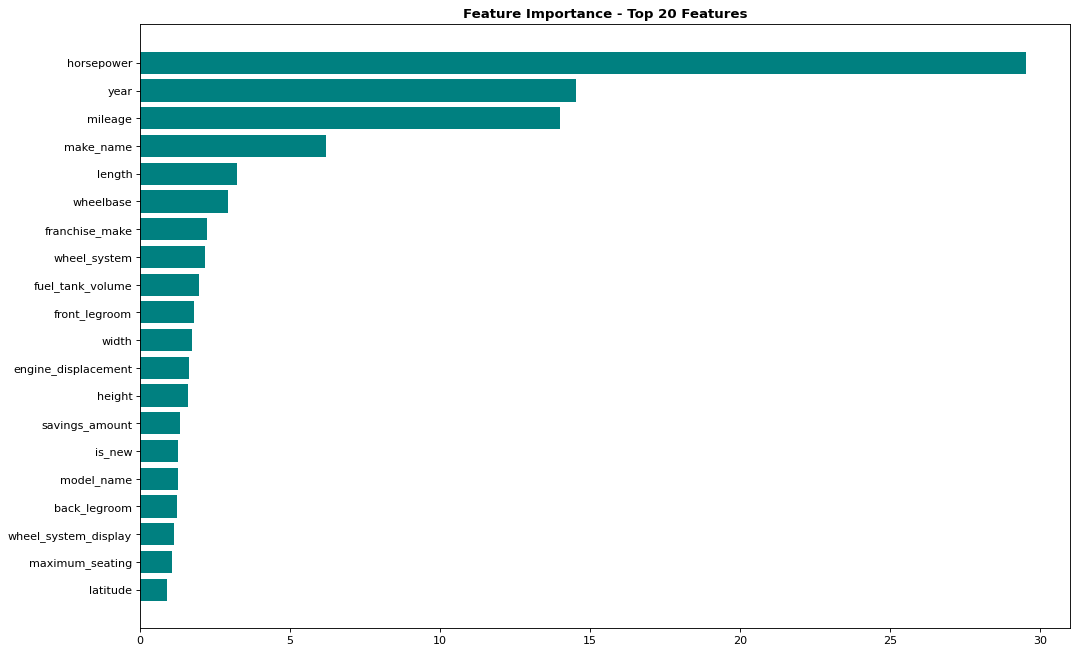

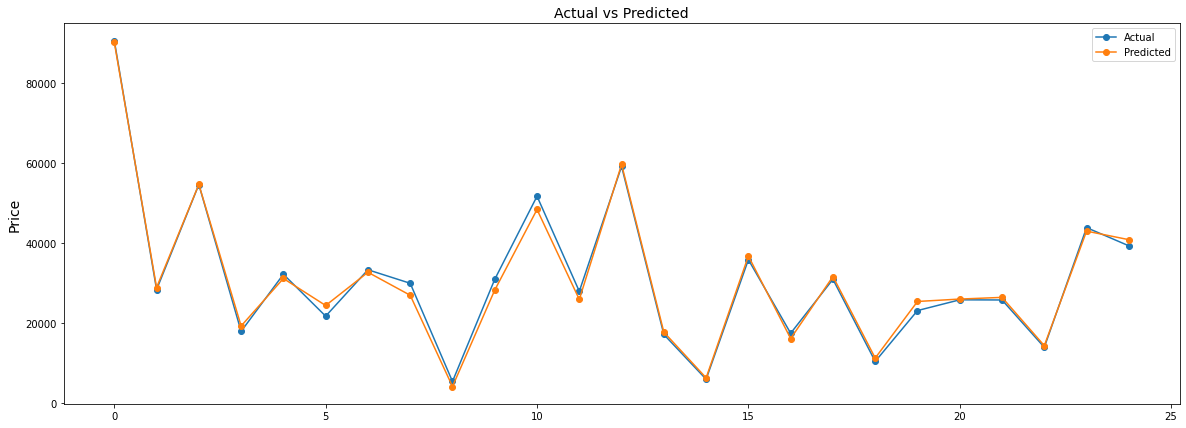


Saving the Best Performing Model

Model is saved Successfully!!


In [ ]:
#Catboost 
model_train('CatBoostRegressor',X_train,y_train,X_test,y_test)




---

## XGBRegressor



---



[05:05:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Testing Performance Metrics for the XGBRegressor :

                            R2: 0.92
      Mean Squared Error (MSE): 19574269.93
Root Mean Squared Error (RMSE): 4424.28

Plotting the Feature Importance Graph for the XGBRegressor :



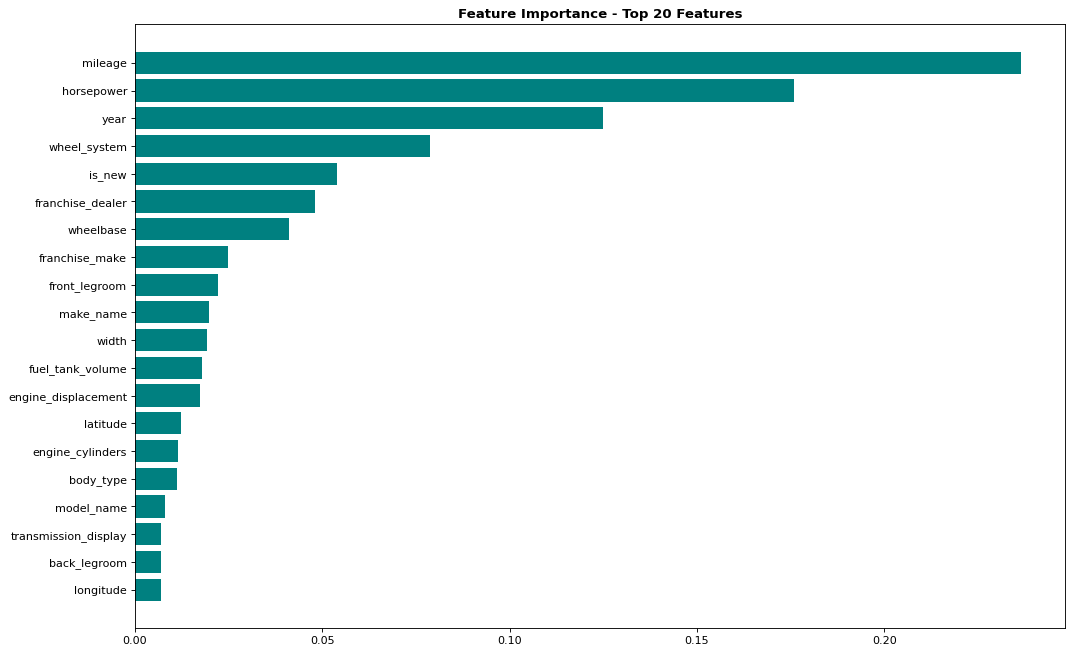

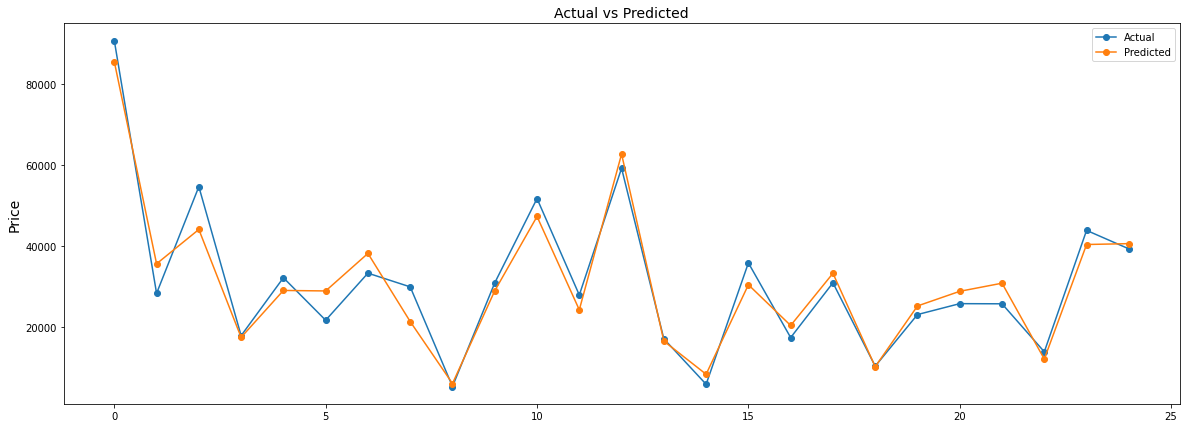


Saving the Best Performing Model

Model is saved Successfully!!


In [ ]:
#XGB 
model_train('XGBRegressor',X_train,y_train,X_test,y_test)



---



## Random Forest Regressor



---



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()



Testing Performance Metrics for the RandomForestRegressor :

                            R2: 0.97
      Mean Squared Error (MSE): 7186420.56
Root Mean Squared Error (RMSE): 2680.75

Plotting the Feature Importance Graph for the RandomForestRegressor :



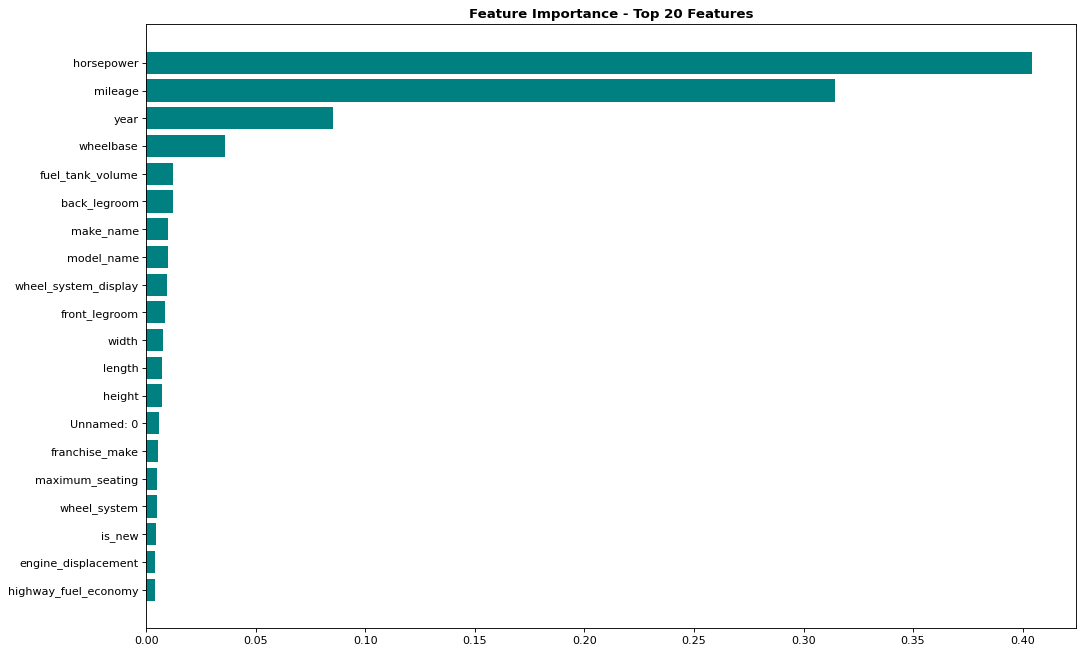

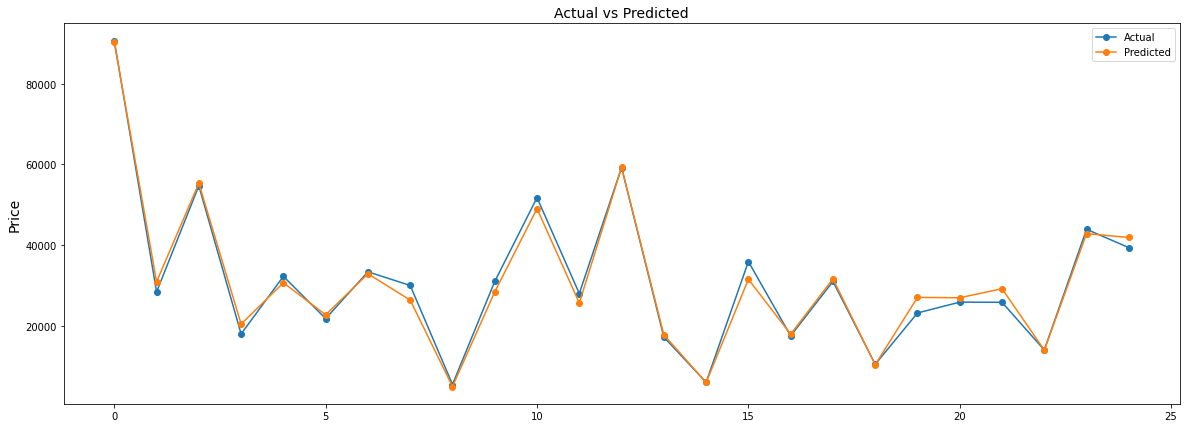


Saving the Best Performing Model

Model is saved Successfully!!


In [ ]:
#Random Forest 
model_train('RandomForestRegressor',X_train,y_train,X_test,y_test)



---

## KNN


---



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [ ]:
rmseval = [] 
for K in range(15):
    K += 1
    knn_model = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn_model.fit(X_train, y_train)  
    pred = knn_model.predict(X_test) 
    rmse = (np.sqrt(mean_squared_error(y_test, pred))) 
    rmseval.append(rmse) 
    print('\033[1m')
    print(f"      When K = {K}")
    print("   RMSE Value: {:.2f}".format(rmse))
    


      When K = 1
   RMSE Value: 9444.94

      When K = 2
   RMSE Value: 8643.92

      When K = 3
   RMSE Value: 8422.89

      When K = 4
   RMSE Value: 8396.48

      When K = 5
   RMSE Value: 8396.37

      When K = 6
   RMSE Value: 8424.55

      When K = 7
   RMSE Value: 8464.19

      When K = 8
   RMSE Value: 8506.96

      When K = 9
   RMSE Value: 8557.77

      When K = 10
   RMSE Value: 8610.08

      When K = 11
   RMSE Value: 8660.69

      When K = 12
   RMSE Value: 8712.34

      When K = 13
   RMSE Value: 8756.35

      When K = 14
   RMSE Value: 8798.88

      When K = 15
   RMSE Value: 8848.53


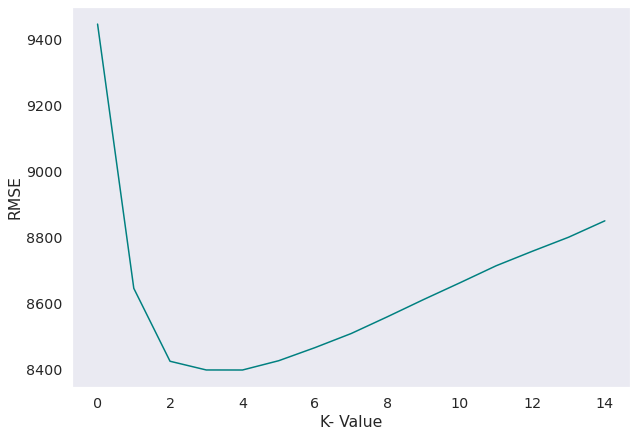

In [ ]:
#Plotting RMSE vs K-Value
import seaborn as sns


sns.set(font_scale=1.3)
elbow_curve = pd.DataFrame(rmseval) 

elbow_curve.plot(legend=None,figsize=(10,7), color="teal")


plt.ylabel("RMSE")
plt.xlabel("K- Value")
plt.grid(b=None)


In [ ]:
#KNN with optimal value k=3
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)

#Evaluating the model
accuracy = knn_model.score(X_test, y_test) * 100
mse = mean_squared_error(y_test, pred)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)


In [ ]:
print('\033[1m')
print(f"Testing Performance Metrics for the KNN Model :")
print('\033[0m')
print("                            R2: {:.2f}".format(r2))
print("                      Accuracy: {:.2f}".format(accuracy) + " %")
print("      Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))


Testing Performance Metrics for the KNN Model :

                            R2: 0.71
                      Accuracy: 70.64 %
      Mean Squared Error (MSE): 70945017.47
Root Mean Squared Error (RMSE): 8422.89


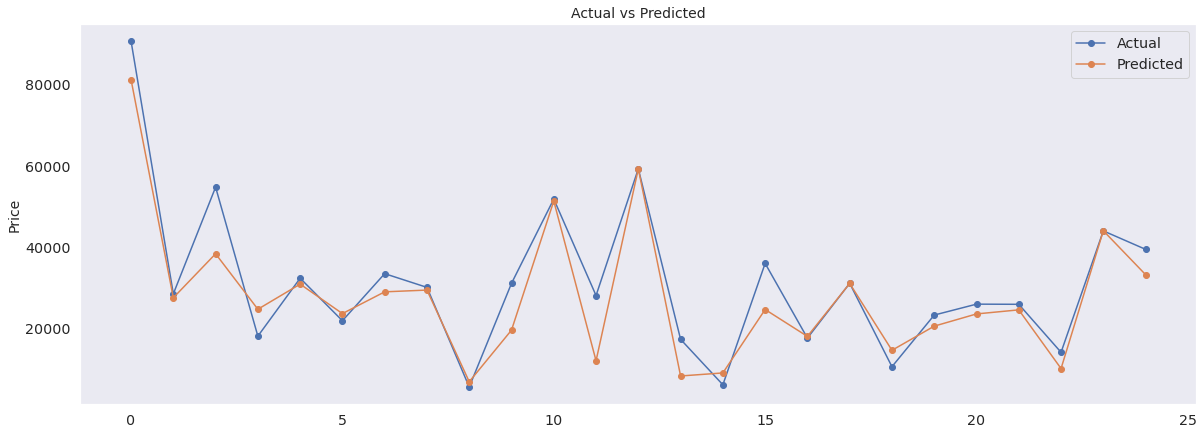

In [ ]:
  #Plotting Actual Vs Pred

Actual_Pred = pd.DataFrame({'Actual': y_test['price'], 'Predicted': pred.flatten()})
Actual_Pred = Actual_Pred.head(25)
round(Actual_Pred,2)

Result = Actual_Pred[['Actual','Predicted']]
Result = Result.reset_index(drop=True)

Result.plot(marker='o',figsize=(20,7))
plt.title('Actual vs Predicted', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(False)
plt.show()



---

# Selecting Important Features 



---



In [ ]:
# Selecting the Important Features
#Used_car_df_imp=Used_car_df[['horsepower','mileage', 'year', 'make_name','wheelbase','price']]

Used_car_df_imp=Used_car_df[['horsepower','mileage', 'year', 'make_name','wheelbase','is_new', 'franchise_make','wheel_system_display','model_name','price']]

In [ ]:
Used_car_df_imp.head()

,horsepower,mileage,year,make_name,wheelbase,is_new,franchise_make,wheel_system_display,model_name,price
0,177.0,7.0,2019,22,101.2,1,19,3,480,23141.0
1,246.0,8.0,2020,24,107.9,1,21,1,162,46500.0
2,340.0,11.0,2020,24,115.0,1,21,1,161,67430.0
3,246.0,7.0,2020,24,107.9,1,21,1,162,48880.0
4,247.0,12.0,2020,24,113.1,1,21,1,476,66903.0


In [ ]:
# y -> Target Feature
X = Used_car_df_imp.drop('price',axis=1)
y = Used_car_df_imp[['price']]


In [ ]:
# Splitting the data in the ratio of 80 : 20


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("There are {} Training Data".format(X_train.shape[0]))
print("There are {} Testing Data".format(X_test.shape[0]))

There are 80000 Training Data
There are 20000 Testing Data


In [ ]:
# Function for training the model

def model_train_imp(model_name,X_train,y_train,X_test,y_test):
  if model_name == 'CatBoostRegressor':
    model = CatBoostRegressor(iterations=1000, learning_rate=0.1, od_type="Iter", od_wait=2000, random_seed=63, loss_function="RMSE", verbose=False)
  elif model_name == 'XGBRegressor':
    model = XGBRegressor(iterations=1000, learning_rate=0.1, od_type="Iter", od_wait=2000, random_seed=63, loss_function="RMSE", verbose=False)
  elif model_name == 'RandomForestRegressor':
    model = RandomForestRegressor(n_estimators=20, random_state=0)
  else:
    print("Invalid Model Name!! Please give a proper model name!")

  train_fit = model.fit(X_train, y_train)
    
  #Evaluating the model on the test dataset
  model_score = model.score(X_test, y_test)
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  rmse = (np.sqrt(mean_squared_error(y_test, pred)))
  r2 = r2_score(y_test, pred)
  print('\033[1m')
  print(f"Testing Performance Metrics for the {model_name} :")
  print('\033[0m')
  print("                            R2: {:.2f}".format(r2))
  print("      Mean Squared Error (MSE): {:.2f}".format(mse))
  print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
  

  #Saving the Best Performing Model File
  import pickle
  if model_name == 'CatBoostRegressor':
    print()
    print("Saving the Best Performing Model")
    
    file = open('cat_model_imp.pkl', 'wb')
    pickle.dump(model, file)
    print()
    print("Model is saved Successfully!!")
  elif model_name == 'XGBRegressor':
    print()
    print("Saving the Best Performing Model")
    
    file = open('xgb_model_imp.pkl', 'wb')
    pickle.dump(model, file)
    print()
    print("Model is saved Successfully!!") 
  elif model_name == 'RandomForestRegressor':
    print()
    print("Saving the Best Performing Model")
    
    file = open('rf_model_imp.pkl', 'wb')
    pickle.dump(model, file)
    print()
    print("Model is saved Successfully!!") 

In [ ]:
!touch xgb_model_imp.pkl
!touch cat_model_imp.pkl
!touch rf_model_imp.pkl



---

##CatBoost - Important Features



---



In [ ]:
#Catboost 
model_train_imp('CatBoostRegressor',X_train,y_train,X_test,y_test)


Testing Performance Metrics for the CatBoostRegressor :

                            R2: 0.96
      Mean Squared Error (MSE): 10544821.32
Root Mean Squared Error (RMSE): 3247.28

Saving the Best Performing Model

Model is saved Successfully!!


In [ ]:
# #Testing the App
# import pickle
# model = open('cat_model_imp.pkl','rb')
# model_pred = pickle.load(model)

# Price = model_pred.predict([[177 , 7, 2019, 21, 101.2]])
# print(Price)




---

## XGBRegressor - Important Features



---



In [ ]:
#XGB 
model_train_imp('XGBRegressor',X_train,y_train,X_test,y_test)

[05:15:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Testing Performance Metrics for the XGBRegressor :

                            R2: 0.91
      Mean Squared Error (MSE): 21998480.46
Root Mean Squared Error (RMSE): 4690.25

Saving the Best Performing Model

Model is saved Successfully!!




---



## Random Forest Regressor - Important Features



---



In [ ]:
#Random Forest 
model_train_imp('RandomForestRegressor',X_train,y_train,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



Testing Performance Metrics for the RandomForestRegressor :

                            R2: 0.95
      Mean Squared Error (MSE): 11683772.36
Root Mean Squared Error (RMSE): 3418.15

Saving the Best Performing Model

Model is saved Successfully!!




---
 
## KNN - Important Features


---



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [ ]:
rmseval = [] 
for K in range(15):
    K += 1
    knn_model = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn_model.fit(X_train, y_train)  
    pred = knn_model.predict(X_test) 
    rmse = (np.sqrt(mean_squared_error(y_test, pred))) 
    rmseval.append(rmse) 
    print('\033[1m')
    print(f"      When K = {K}")
    print("   RMSE Value: {:.2f}".format(rmse))
    


      When K = 1
   RMSE Value: 7042.48

      When K = 2
   RMSE Value: 6341.46

      When K = 3
   RMSE Value: 6105.68

      When K = 4
   RMSE Value: 6004.67

      When K = 5
   RMSE Value: 5972.17

      When K = 6
   RMSE Value: 5972.70

      When K = 7
   RMSE Value: 5980.80

      When K = 8
   RMSE Value: 5997.54

      When K = 9
   RMSE Value: 6010.17

      When K = 10
   RMSE Value: 6030.67

      When K = 11
   RMSE Value: 6043.01

      When K = 12
   RMSE Value: 6064.53

      When K = 13
   RMSE Value: 6081.56

      When K = 14
   RMSE Value: 6110.51

      When K = 15
   RMSE Value: 6138.12


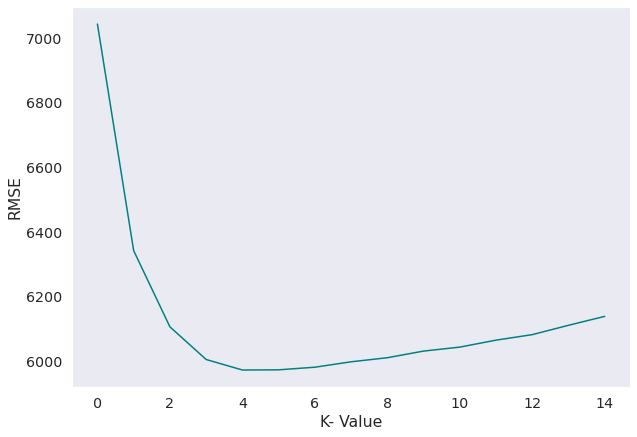

In [ ]:
#Plotting RMSE vs K-Value
import seaborn as sns


sns.set(font_scale=1.3)
elbow_curve = pd.DataFrame(rmseval) 

elbow_curve.plot(legend=None,figsize=(10,7), color="teal")

plt.ylabel("RMSE")
plt.xlabel("K- Value")
plt.grid(b=None)


In [ ]:
#KNN with optimal value k=3
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)

#Evaluating thr model
accuracy = knn_model.score(X_test, y_test) * 100
mse = mean_squared_error(y_test, pred)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)


In [ ]:
print('\033[1m')
print(f"Testing Performance Metrics for the KNN Model :")
print('\033[0m')
print("                            R2: {:.2f}".format(r2))
print("                      Accuracy: {:.2f}".format(accuracy) + " %")
print("      Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))


Testing Performance Metrics for the KNN Model :

                            R2: 0.85
                      Accuracy: 84.57 %
      Mean Squared Error (MSE): 37279295.00
Root Mean Squared Error (RMSE): 6105.68


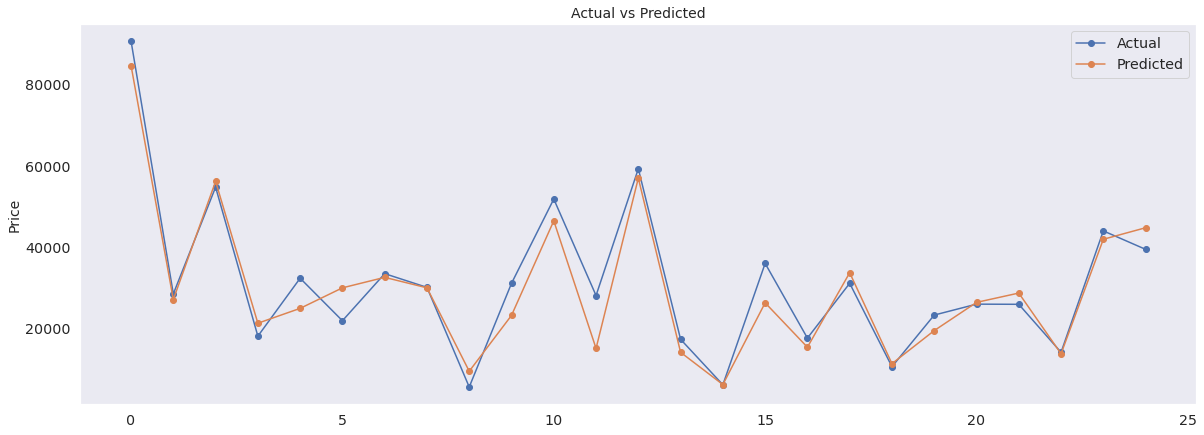

In [ ]:
#Plotting Actual Vs Pred

Actual_Pred = pd.DataFrame({'Actual': y_test['price'], 'Predicted': pred.flatten()})
Actual_Pred = Actual_Pred.head(25)
round(Actual_Pred,2)

Result = Actual_Pred[['Actual','Predicted']]
Result = Result.reset_index(drop=True)

Result.plot(marker='o',figsize=(20,7))
plt.title('Actual vs Predicted', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(False)
plt.show()